## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\politplatschquatsch.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/an...,"schi, afrika, xi, demo, kultur, nazi, ss, us, ...",2024-08-23,2024-08-23,2024-11-01,NaN,NaN,NaN,An der Grenze des Sagbaren: Comeback des Fickers,"Jan Boehmermanns Aufforderung an Elon Musk, er...",Noch immer reagiert Elon Musk nicht auf die ge...,0.0,0.0,1.0,1.0
1,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/za...,"klimaschutz, ampel, demo, christ, usa, ss, us,...",2024-08-04,2024-08-04,2024-11-01,NaN,NaN,NaN,"""Zank"", ""Knatsch"" und ""Murks"": An der Grenze z...",Ihrem Ziel eines dynamischen Aufwuchses des St...,Ihrem Ziel eines dynamischen Aufwuchses des St...,0.0,0.0,0.0,1.0
2,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/sc...,"schi, bsw, usa, ss, us, familie, ns, rna, sp",2024-01-22,2024-01-22,2024-11-01,NaN,NaN,NaN,Schwein gehabt: Symbolischer Sonnenblumenschin...,Ruegenwalder Ersatzwurst - Schwein gehabt: Sym...,Augen auf beim Schinken-Kauf: Das gelbe Vegan-...,NaN,NaN,NaN,NaN
3,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/de...,"schi, europa, ampel, trump, demo, nazi, amerik...",2024-01-24,2024-01-24,2024-11-01,NaN,NaN,NaN,Der Deutschlandfresser: Er ist wieder da,wenn Biden als letzte Brandmauer zwischen dem...,"Eigentlich kommt er nur zurueck, um Deutschlan...",0.0,1.0,1.0,0.0
4,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/mi...,"schi, krieg, cdu, politik, spd, usa, ss, us, c...",2024-08-25,2024-08-25,2024-11-01,NaN,NaN,NaN,Missbrauch der Messerstadt: Hetzjagd im Wahlkampf,"Es sind wieder Schicksalsstunden der Republik,...","Die Rechte am Satz ""Meine Gedanken sind bei de...",NaN,NaN,NaN,NaN
5,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/di...,"schi, krieg, xi, politik, usa, ss, energiewend...",2024-08-22,2024-08-22,2024-11-01,NaN,NaN,NaN,Dicke Duden-Ãœberraschung: Freudenspruenge in ...,Dicke Duden-Ãœberraschung: Freudenspruenge in ...,"Nahezu alle Krisenbegriffe, die die Bundeswort...",NaN,NaN,NaN,NaN
6,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/ei...,"ampel, kultur, spo, xi, nazi, usa, afd, us, sp...",2024-01-22,2024-01-22,2024-11-01,NaN,NaN,NaN,Ein Land im Widerstand: Endlich wieder eine Ei...,Ein ganzes Land im Widerstand gegen alle: Endl...,Nach 34 Jahren ist die Einheitsfront gegen rec...,0.0,1.0,1.0,0.0
7,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/ub...,"trump, ampel, demo, kultur, ss, us, spo, leich...",2024-01-25,2024-01-25,2024-11-01,NaN,NaN,NaN,Ãœberdosiskontrolle: Die neue Bundessaettigung...,Schutz vor medialen Ãœberdosen: Die neue Bunde...,Maren Mueller-Sehl ist die erste Bundessaettig...,NaN,NaN,NaN,NaN
8,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/me...,"schi, grenzen, xi, kultur, politik, ss, us, ns...",2024-08-25,2024-08-25,2024-11-01,NaN,NaN,NaN,Messergewalt: Was uns die Daten verraten,Der unspektakulaere Alltagsgegenstand Messer a...,Nach der Gewinn der Fussball-WM 2014 begann de...,NaN,NaN,NaN,NaN
9,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/au...,"afrika, sparen, cdu, politik, christ, ss, us, ...",2024-08-21,2024-08-21,2024-11-01,NaN,NaN,NaN,Auf dem Weg in die Verzichtsgesellschaft: Lebe...,Auf dem Weg in die Verzichtsgesellschaft: Lebe...,Der Einstieg in die Verzichtsgesellschaft steh...,NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News        6.0
Extreme bias     9.0
clickbait       11.0
credible         5.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          35 non-null     object        
 1   provenance           35 non-null     object        
 2   query_keywords       35 non-null     object        
 3   creation_date        35 non-null     datetime64[ns]
 4   last_modified        35 non-null     datetime64[ns]
 5   crawl_date           35 non-null     datetime64[ns]
 6   author_person        0 non-null      float64       
 7   author_organization  0 non-null      float64       
 8   news_keywords        0 non-null      float64       
 9   content_title        35 non-null     object        
 10  content_description  35 non-null     object        
 11  content_body         35 non-null     object        
 12  Fake News            15 non-null     float64       
 13  Extreme bias         15 non-null     

plot of label distr

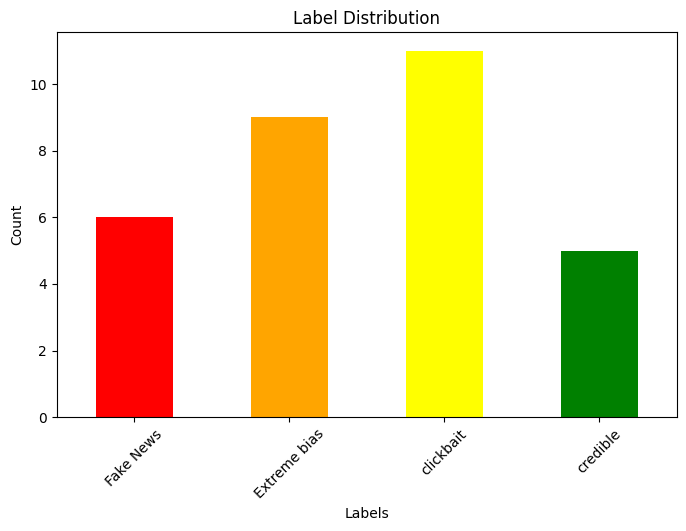

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

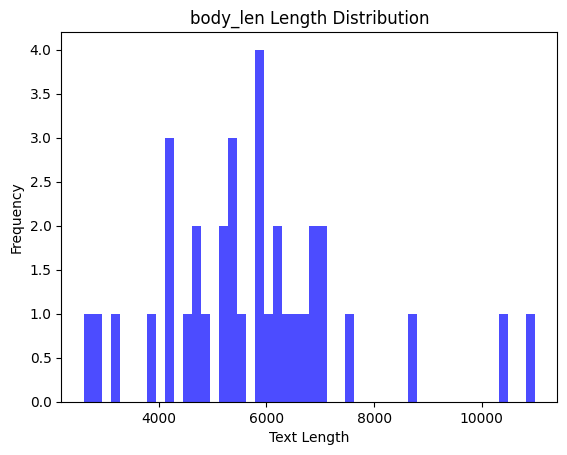

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

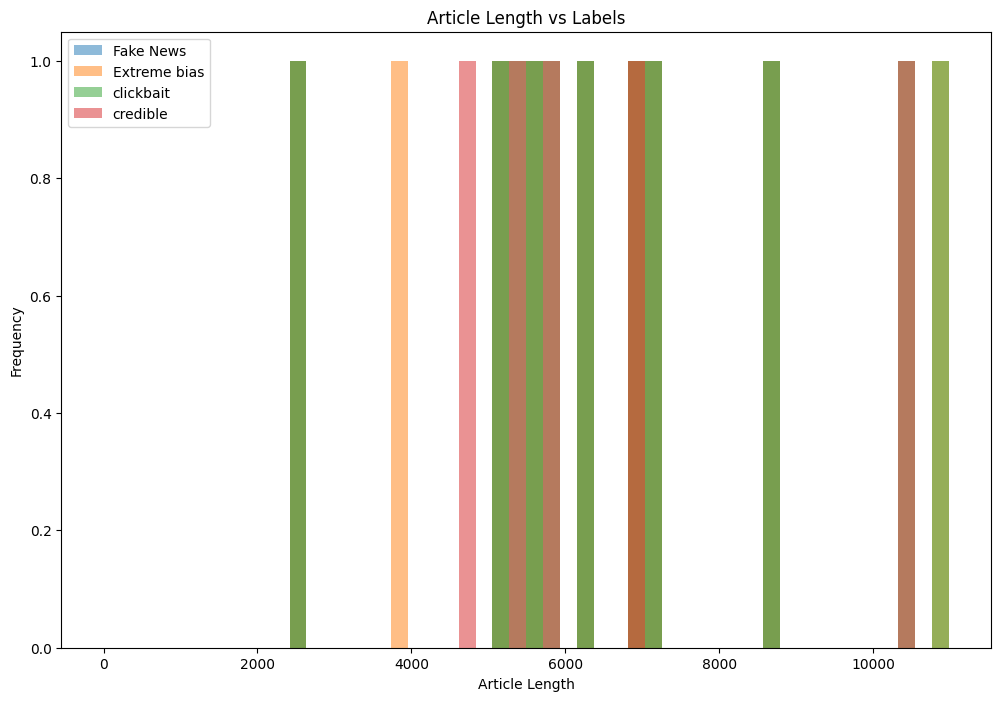

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

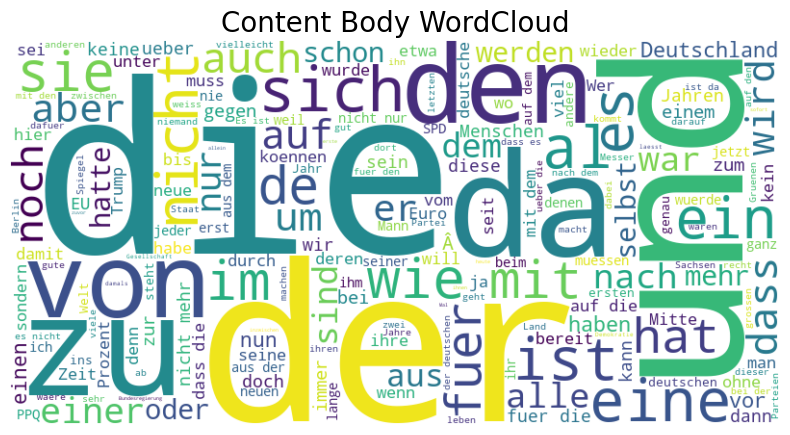

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Body WordCloud')

visualize title

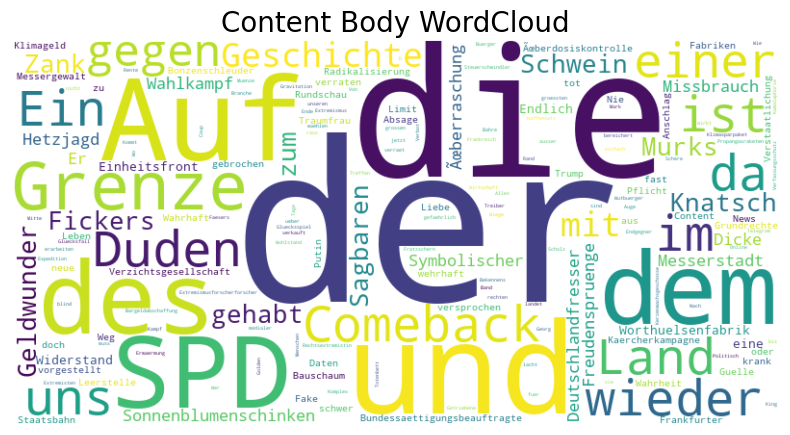

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 15 rows
Unlabelled Data: 20 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/an...,"schi, afrika, xi, demo, kultur, nazi, ss, us, ...",2024-08-23,2024-08-23,2024-11-01,NaN,NaN,NaN,An der Grenze des Sagbaren: Comeback des Fickers,"Jan Boehmermanns Aufforderung an Elon Musk, er...",Noch immer reagiert Elon Musk nicht auf die ge...,0.0,0.0,1.0,1.0,5348,True
1,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/za...,"klimaschutz, ampel, demo, christ, usa, ss, us,...",2024-08-04,2024-08-04,2024-11-01,NaN,NaN,NaN,"""Zank"", ""Knatsch"" und ""Murks"": An der Grenze z...",Ihrem Ziel eines dynamischen Aufwuchses des St...,Ihrem Ziel eines dynamischen Aufwuchses des St...,0.0,0.0,0.0,1.0,6821,True
3,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/de...,"schi, europa, ampel, trump, demo, nazi, amerik...",2024-01-24,2024-01-24,2024-11-01,NaN,NaN,NaN,Der Deutschlandfresser: Er ist wieder da,wenn Biden als letzte Brandmauer zwischen dem...,"Eigentlich kommt er nur zurueck, um Deutschlan...",0.0,1.0,1.0,0.0,6816,True
6,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/ei...,"ampel, kultur, spo, xi, nazi, usa, afd, us, sp...",2024-01-22,2024-01-22,2024-11-01,NaN,NaN,NaN,Ein Land im Widerstand: Endlich wieder eine Ei...,Ein ganzes Land im Widerstand gegen alle: Endl...,Nach 34 Jahren ist die Einheitsfront gegen rec...,0.0,1.0,1.0,0.0,10985,True
10,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/di...,"europa, trump, rki, ss, us, rna, ns, linke, sp",2024-01-21,2024-01-21,2024-11-01,NaN,NaN,NaN,"Die Fake-News-Fabriken: Putin fast tot, Trump ...","Die Fake-News-Fabriken: Putin fast tot, Trump ...","Bei Fernsehauftritten trankt er ""aus einer Tas...",0.0,1.0,0.0,0.0,3808,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16996\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/an...,"schi, afrika, xi, demo, kultur, nazi, ss, us, ...",2024-08-23,2024-08-23,2024-11-01,NaN,NaN,NaN,An der Grenze des Sagbaren: Comeback des Fickers,"Jan Boehmermanns Aufforderung an Elon Musk, er...",Noch immer reagiert Elon Musk nicht auf die ge...,0.0,0.0,1.0,1.0,5348,True,"[0, 0, 1, 1]"
1,politplatschquatsch,https://www.politplatschquatsch.com/2024/08/za...,"klimaschutz, ampel, demo, christ, usa, ss, us,...",2024-08-04,2024-08-04,2024-11-01,NaN,NaN,NaN,"""Zank"", ""Knatsch"" und ""Murks"": An der Grenze z...",Ihrem Ziel eines dynamischen Aufwuchses des St...,Ihrem Ziel eines dynamischen Aufwuchses des St...,0.0,0.0,0.0,1.0,6821,True,"[0, 0, 0, 1]"
3,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/de...,"schi, europa, ampel, trump, demo, nazi, amerik...",2024-01-24,2024-01-24,2024-11-01,NaN,NaN,NaN,Der Deutschlandfresser: Er ist wieder da,wenn Biden als letzte Brandmauer zwischen dem...,"Eigentlich kommt er nur zurueck, um Deutschlan...",0.0,1.0,1.0,0.0,6816,True,"[0, 1, 1, 0]"
6,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/ei...,"ampel, kultur, spo, xi, nazi, usa, afd, us, sp...",2024-01-22,2024-01-22,2024-11-01,NaN,NaN,NaN,Ein Land im Widerstand: Endlich wieder eine Ei...,Ein ganzes Land im Widerstand gegen alle: Endl...,Nach 34 Jahren ist die Einheitsfront gegen rec...,0.0,1.0,1.0,0.0,10985,True,"[0, 1, 1, 0]"
10,politplatschquatsch,https://www.politplatschquatsch.com/2024/01/di...,"europa, trump, rki, ss, us, rna, ns, linke, sp",2024-01-21,2024-01-21,2024-11-01,NaN,NaN,NaN,"Die Fake-News-Fabriken: Putin fast tot, Trump ...","Die Fake-News-Fabriken: Putin fast tot, Trump ...","Bei Fernsehauftritten trankt er ""aus einer Tas...",0.0,1.0,0.0,0.0,3808,True,"[0, 1, 0, 0]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv('ppq_labelled_data.csv', index=False)
unlabelled_df.to_csv('ppq_unlabelled_data.csv', index=False)